#### Step-by-Step

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Load data
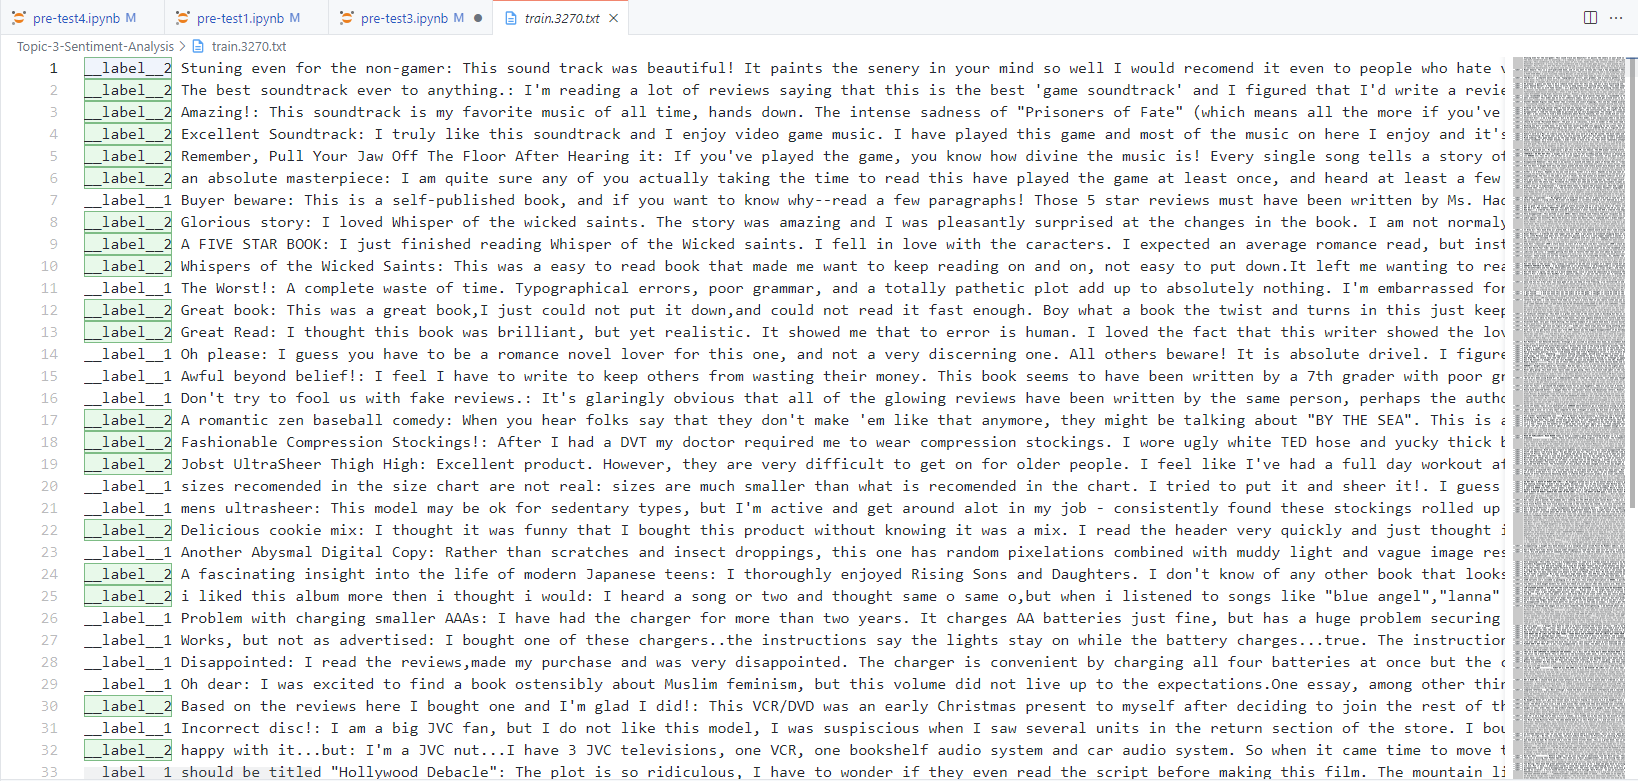

In [4]:
# Load training data from file
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3270 non-null   int64 
 1   text    3270 non-null   object
dtypes: int64(1), object(1)
memory usage: 51.2+ KB


In [6]:
df_train.head(10)

,label,text
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."
5,2,an absolute masterpiece: I am quite sure any o...
6,1,"Buyer beware: This is a self-published book, a..."
7,2,Glorious story: I loved Whisper of the wicked ...
8,2,A FIVE STAR BOOK: I just finished reading Whis...
9,2,Whispers of the Wicked Saints: This was a easy...


##### Preprocess Text

In [7]:
first_text = df_train['text'][0]
print(first_text)

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^


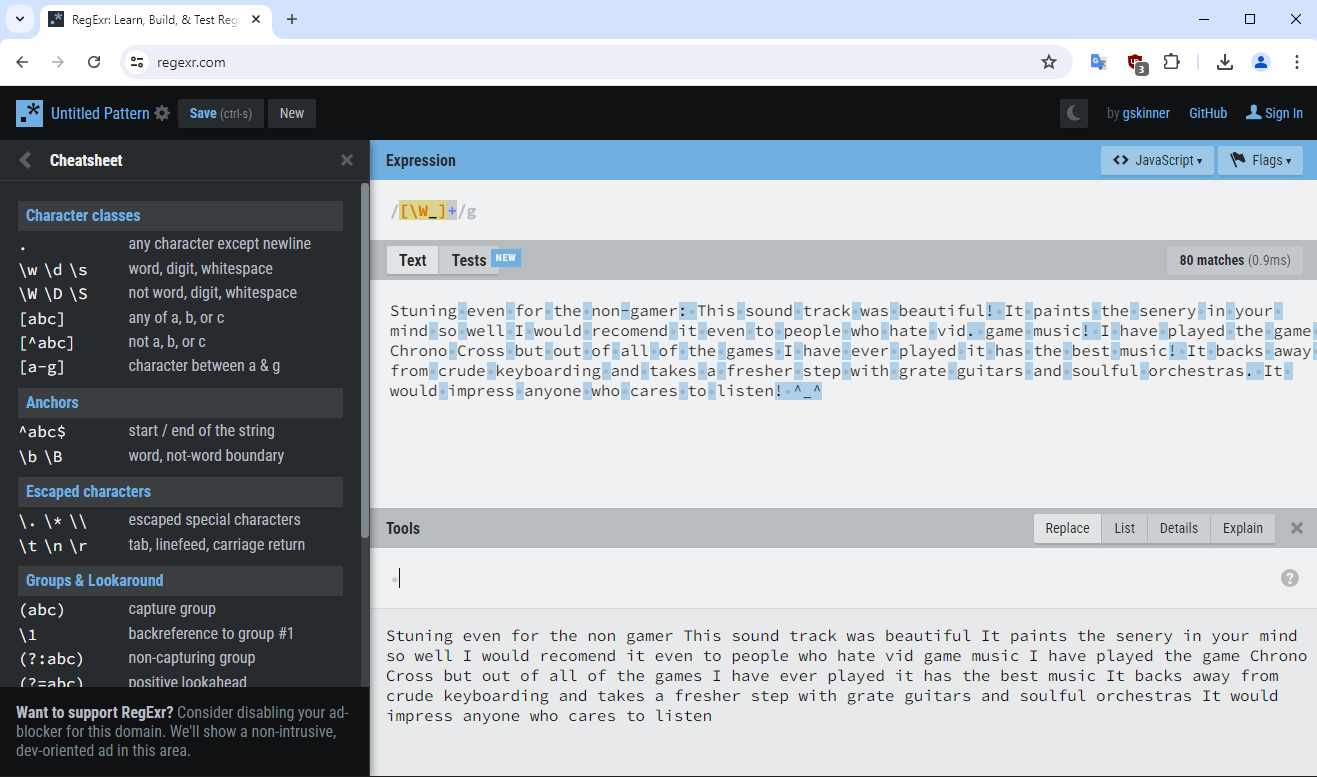

In [7]:
first_text_lower = first_text.lower()
first_text_word_only = re.sub(r"[\W_]+", ' ', first_text_lower)
print(first_text)
print(first_text_word_only)

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
stuning even for the non gamer this sound track was beautiful it paints the senery in your mind so well i would recomend it even to people who hate vid game music i have played the game chrono cross but out of all of the games i have ever played it has the best music it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras it would impress anyone who cares to listen 


In [8]:
# Remove stop words
stop_words = set(stopwords.words('english'))
print('Stop words: ', len(stop_words))
print(stop_words)

all_words = first_text_word_only.split()
print('all words: ', len(all_words))
print(all_words)

list_words = []
for word in all_words:
    if (word not in stop_words):
        list_words.append(word)
print('after remove stopwords: ',len(list_words))
print(list_words)
print()

print(first_text)
print(first_text_word_only)
print(' '.join(list_words))

Stop words:  179
{"needn't", 'some', 'how', 'shan', 'too', 'these', 'it', 'before', 'from', 'mustn', 'all', 'yourself', 'your', 'yours', "won't", 'm', 'of', 'where', 'you', 'for', 'during', "wouldn't", 'off', 'at', 'just', 'more', 'needn', 've', 'they', 'whom', 'hers', 'to', "it's", 'any', 'his', 'or', 'having', 'few', "don't", 'the', 'doesn', 'been', "doesn't", 'only', 'were', 'them', 'then', 'we', 'myself', 'ma', 'that', 'between', 'was', "she's", 'below', 'don', 'her', 'if', 'further', 'o', 'y', 'aren', 'while', 'ours', "you're", 'after', 'its', 'against', 'again', 'i', "you've", 'down', 'ain', 'in', 'shouldn', 'when', 'wasn', "haven't", 'through', 'so', 'no', "isn't", 'their', 'wouldn', 'those', 'd', 'what', "couldn't", 'hasn', 'herself', 't', 'doing', 'as', 'themselves', 'couldn', 'is', "hasn't", "mustn't", 'itself', 'weren', "you'd", 'into', 'out', 'each', 'theirs', 'which', 'am', 'didn', 'yourselves', 'but', "weren't", 'because', 'and', 'he', 'above', "hadn't", 'both', 'hadn', '

In [ ]:
# combine
" ".join([x for x in re.sub(r"[\W_]+", ' ', first_text.lower()).split() if x not in stop_words])

In [11]:
print(' '.join(list_words))
print()
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
first_text_stemming = [stemmer.stem(word) for word in list_words]
print(' '.join(first_text_stemming))

# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
first_text_lemmantizer = [lemmatizer.lemmatize(word) for word in list_words]
print(' '.join(first_text_lemmantizer))

stuning even non gamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen

stune even non gamer sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen
stuning even non gamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen


In [12]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)


df_train['text'] = df_train['text'].apply(preprocess_text)

In [13]:
# Load training data from file and preprocess text
def preprocess_data_and_text_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        text = preprocess_text(text)
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

train_filepath = 'train.3270.txt'
df_train = preprocess_data_and_text_from_file(train_filepath)

In [ ]:
# Split data into features and labels
X = df_train['text']
y = df_train['label']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Handling Imbalanced Data

# Before handling imbalanced data, let's check the distribution of labels.
print(y.value_counts())

label
1    1770
2    1500
Name: count, dtype: int64


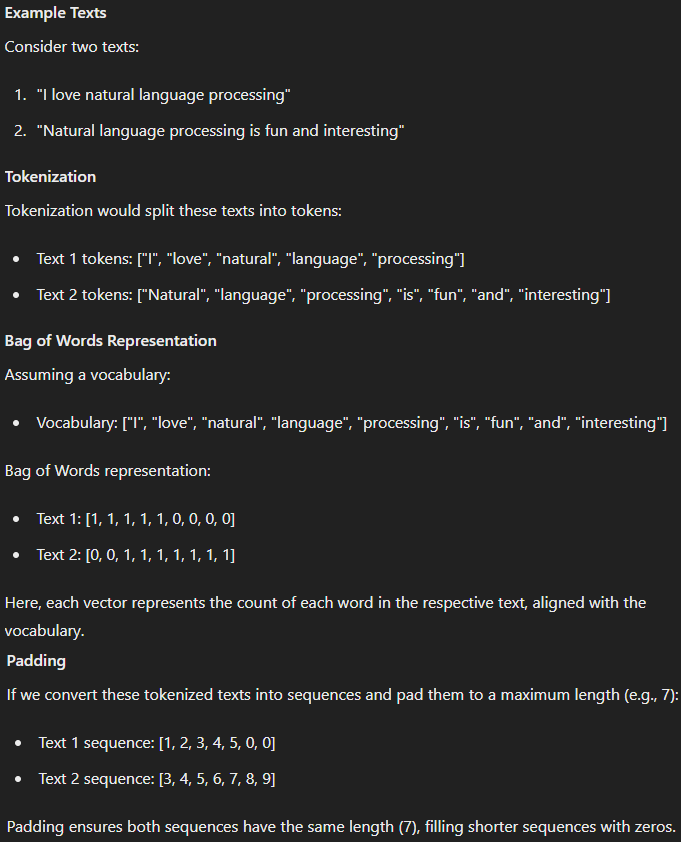

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load training data from file
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing to the text data
df_train['text'] = df_train['text'].apply(preprocess_text)

# Split data into features and labels
X = df_train['text']
y = df_train['label']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Tokenize and pad sequences
max_vocab_size = 20000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X)
# Print the word vocabulary
print(f"word_counts: {tokenizer.word_counts}\n")
print(f"word_index: {tokenizer.word_index}\n{len(tokenizer.word_index)}\n")

# Convert text to sequences of integers
X_sequences = tokenizer.texts_to_sequences(X)
print(f"X_text[0]: {X.to_list()[0]}\n")
print(f"X_sequences[0]: {X_sequences[0]}\n")

# Calculate maximum sequence length
max_sequence_length = max(len(seq) for seq in X_sequences)
print(f"Maximum sequence length in the dataset: {max_sequence_length}\n")

# Pad sequences
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')
print(f"X_padded[0]: {X_padded[0]}\n{len(X_padded[0])}\n")

# Split padded sequences and labels into training and validation sets
X_train_padded, X_val_padded, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

word_counts: OrderedDict([('stuning', 1), ('even', 464), ('non', 47), ('gamer', 2), ('sound', 197), ('track', 136), ('beautiful', 78), ('paint', 17), ('senery', 1), ('mind', 91), ('well', 472), ('would', 766), ('recomend', 14), ('people', 288), ('hate', 47), ('vid', 1), ('game', 270), ('music', 303), ('played', 53), ('chrono', 5), ('cross', 11), ('ever', 260), ('best', 342), ('back', 325), ('away', 107), ('crude', 13), ('keyboarding', 1), ('take', 223), ('fresher', 1), ('step', 27), ('grate', 1), ('guitar', 38), ('soulful', 5), ('orchestra', 2), ('impress', 6), ('anyone', 174), ('care', 59), ('listen', 99), ('soundtrack', 28), ('anything', 114), ('reading', 286), ('lot', 210), ('review', 247), ('saying', 28), ('figured', 18), ('write', 44), ('disagree', 4), ('bit', 130), ('opinino', 1), ('yasunori', 2), ('mitsuda', 4), ('ultimate', 3), ('masterpiece', 29), ('timeless', 13), ('listening', 53), ('year', 409), ('beauty', 20), ('simply', 81), ('refuse', 8), ('fade', 6), ('price', 169), ('t

In [17]:
# Function to tokenize and pad sequences
def tokenize_and_pad_sequences(X_train, X_val, max_vocab_size=20000, max_sequence_length=None):
    # Initialize tokenizer
    tokenizer = Tokenizer(num_words=max_vocab_size)
    tokenizer.fit_on_texts(X_train)
    
    # Convert texts to sequences
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_val_sequences = tokenizer.texts_to_sequences(X_val)
    
    # Determine maximum sequence length
    max_length = max(len(seq) for seq in X_train_sequences)
    if max_sequence_length is None:
        max_sequence_length = max_length
    else:
        max_sequence_length = min(max_sequence_length, max_length)
    
    # Print word counts and vocabulary size
    print(f"Word Counts: {tokenizer.word_counts}\n")
    print(f"Word Index: {tokenizer.word_index}\nVocabulary Size: {len(tokenizer.word_index)}\n")
    
    # Print example of tokenization
    print(f"Example of Original Text:\n{X_train.to_list()[0]}\n")
    print(f"Example of Tokenized Sequence:\n{X_train_sequences[0]}\n")
    
    # Print maximum sequence length
    print(f"Maximum sequence length in the dataset: {max_length}\n")
    
    # Pad sequences
    X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
    X_val_padded = pad_sequences(X_val_sequences, maxlen=max_sequence_length)
    
    # Print example of padded sequence
    print(f"Example of Padded Sequence:\n{X_train_padded[0]}\nLength: {len(X_train_padded[0])}\n")
    
    return X_train_padded, X_val_padded, tokenizer


# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

max_vocab_size = 20000
max_sequence_length = None

X_train_padded, X_val_padded, tokenizer = tokenize_and_pad_sequences(X_train, X_val, max_vocab_size, max_sequence_length)

Word Counts: OrderedDict([('great', 684), ('basic', 40), ('midi', 11), ('understanding', 22), ('setup', 4), ('student', 35), ('musician', 17), ('institute', 3), ('la', 26), ('wanted', 77), ('learn', 48), ('bought', 235), ('book', 1935), ('old', 189), ('picture', 111), ('couple', 59), ('section', 30), ('date', 28), ('able', 78), ('tell', 95), ('difference', 26), ('today', 56), ('computer', 92), ('used', 157), ('music', 242), ('fine', 76), ('explanation', 10), ('easy', 111), ('discription', 1), ('message', 27), ('sent', 31), ('use', 216), ('put', 174), ('together', 66), ('system', 33), ('helped', 10), ('lot', 175), ('must', 147), ('read', 696), ('everyone', 63), ('need', 173), ('classic', 121), ('amazing', 69), ('look', 217), ('piousness', 1), ('early', 26), ('settler', 2), ('really', 437), ('appreciated', 6), ('solid', 19), ('popcorn', 4), ('flick', 9), ('ignore', 9), ('hater', 1), ('still', 208), ('giant', 10), ('robot', 13), ('space', 20), ('fighting', 11), ('enough', 135), ('said', 1

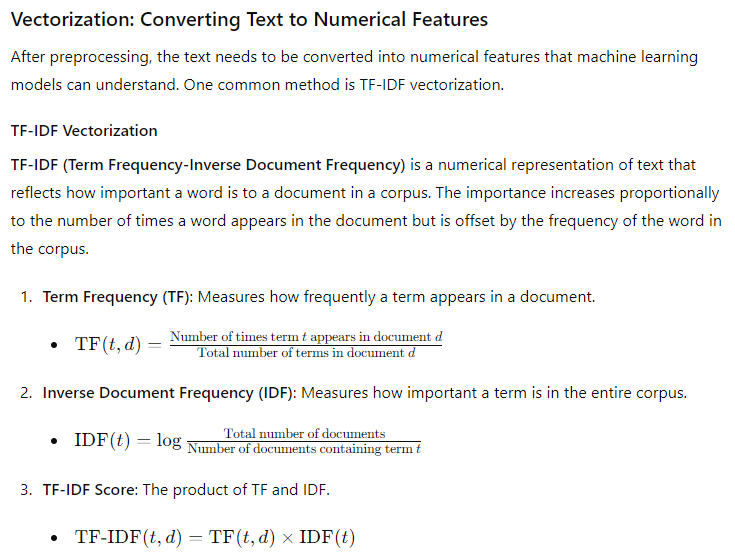

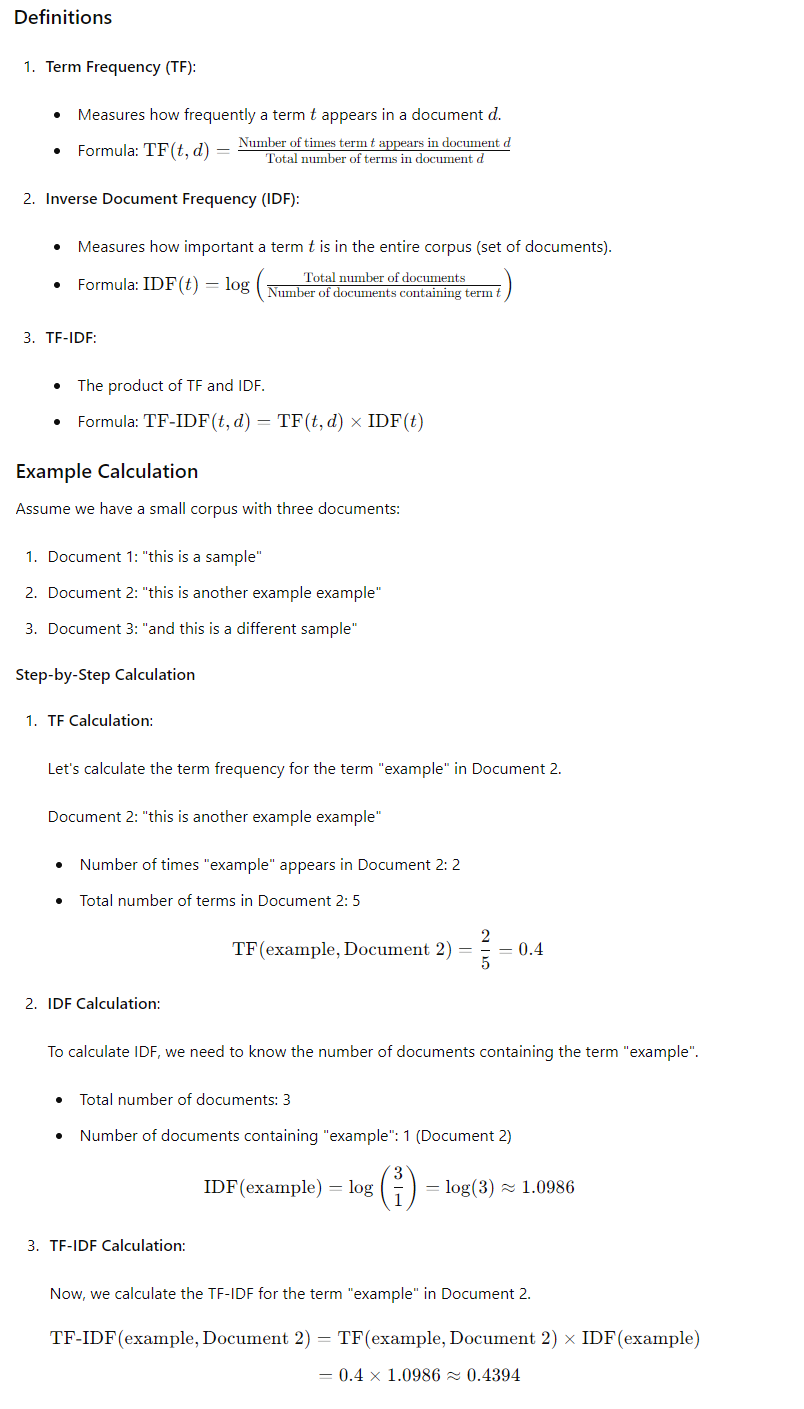

In [1]:
import numpy as np

# Example documents
documents = [
    "this is a sample",
    "this is another example example",
    "and this is a different sample"
]

# Split documents into words
tokenized_documents = [doc.split() for doc in documents]

# Calculate TF for a term in a specific document
def compute_tf(term, document):
    term_count = document.count(term)
    total_terms = len(document)
    return term_count / total_terms

# Calculate IDF for a term across all documents
def compute_idf(term, all_documents):
    num_documents_with_term = sum(1 for doc in all_documents if term in doc)
    total_documents = len(all_documents)
    return np.log(total_documents / num_documents_with_term)

# Calculate TF-IDF for a term in a specific document
def compute_tf_idf(term, document, all_documents):
    tf = compute_tf(term, document)
    idf = compute_idf(term, all_documents)
    return tf * idf

# Example calculation
term = "example"
document_index = 1  # Document 2
document = tokenized_documents[document_index]

tf = compute_tf(term, document)
idf = compute_idf(term, tokenized_documents)
tf_idf = compute_tf_idf(term, document, tokenized_documents)

print(f"TF({term}, Document {document_index + 1}) = {tf}")
print(f"IDF({term}) = {idf}")
print(f"TF-IDF({term}, Document {document_index + 1}) = {tf_idf}")

TF(example, Document 2) = 0.4
IDF(example) = 1.0986122886681098
TF-IDF(example, Document 2) = 0.43944491546724396


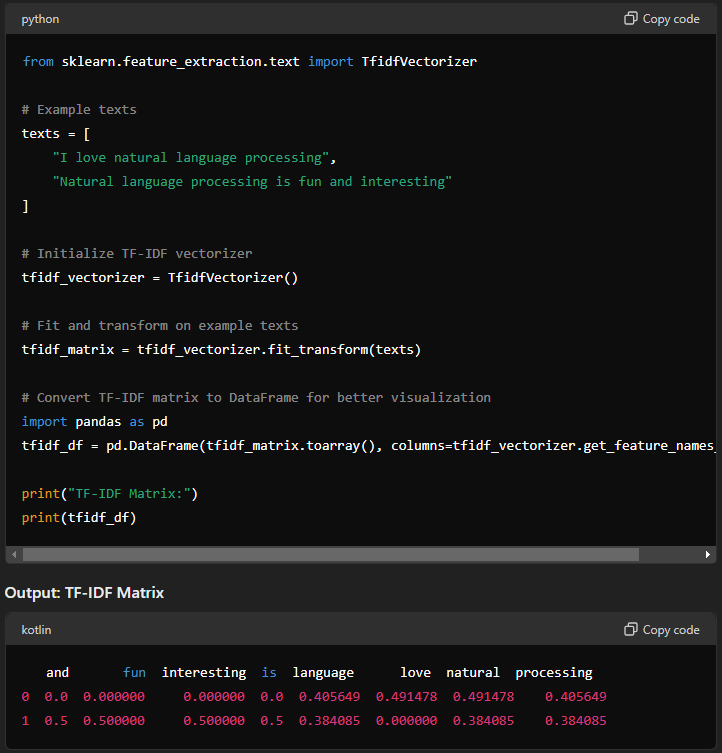

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Example texts
texts = [
    "I love natural language processing",
    "Natural language processing is fun and interesting"
]

# Step 1: Tokenize and count word frequencies without removing stop words
count_vectorizer = CountVectorizer()
word_count_matrix = count_vectorizer.fit_transform(texts)
word_count_df = pd.DataFrame(word_count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

print("Word Count Matrix:")
print(word_count_df)

# Debugging: Print vocabulary to check if "I" is included
print("Vocabulary:")
print(count_vectorizer.vocabulary_)

# Step 2: Inspect the word frequencies
word_frequencies = word_count_df.sum(axis=0)
sorted_word_frequencies = word_frequencies.sort_values(ascending=False)

print("\nWord Frequencies:")
print(sorted_word_frequencies)

# Step 3: Apply TF-IDF vectorization based on inspected frequencies
# Decide the max_features value based on inspection
max_features = 10  # Example value, adjust based on your inspection

# Initialize TF-IDF vectorizer with chosen max_features
tfidf_vectorizer = TfidfVectorizer(max_features=max_features, stop_words=None)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix:")
print(tfidf_df)


Word Count Matrix:
   and  fun  interesting  is  language  love  natural  processing
0    0    0            0   0         1     1        1           1
1    1    1            1   1         1     0        1           1
Vocabulary:
{'love': 5, 'natural': 6, 'language': 4, 'processing': 7, 'is': 3, 'fun': 1, 'and': 0, 'interesting': 2}

Word Frequencies:
language       2
natural        2
processing     2
and            1
fun            1
interesting    1
is             1
love           1
dtype: int64

TF-IDF Matrix:
        and       fun  interesting        is  language      love   natural  \
0  0.000000  0.000000     0.000000  0.000000  0.448321  0.630099  0.448321   
1  0.425677  0.425677     0.425677  0.425677  0.302873  0.000000  0.302873   

   processing  
0    0.448321  
1    0.302873  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Sample Data (For demonstration purposes)
df_train = pd.DataFrame({
    'label': [1, 2, 1, 2],
    'text': [
        "I love this product, it's amazing.",
        "Terrible experience, would not recommend.",
        "Fantastic quality and great service.",
        "Worst product ever, completely useless."
    ]
})

# Preprocess text function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\W', ' ', text)  # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply text preprocessing
df_train['text'] = df_train['text'].apply(preprocess_text)

# Split data into features and labels
X = df_train['text']
y = df_train['label']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Show the first text converted to numerical form
first_text = X_train.iloc[0]
first_text_tfidf = vectorizer.transform([first_text])
print(f"First text: {first_text}")

# Get the feature names (terms) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the terms with their corresponding TF-IDF scores for the first text
print("Terms and TF-IDF scores for the first text:")
for index, score in zip(first_text_tfidf.indices, first_text_tfidf.data):
    term = feature_names[index]
    print(f"({index}, {term})\t{score}")

# Model selection and training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Model evaluation on validation set
y_val_pred = model.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load training data from file
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the text data
df_train['text'] = df_train['text'].apply(preprocess_text)

# Split data into features and labels
X = df_train['text']
y = df_train['label']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a method for tokenization and word frequency counting
def tokenize_and_count_freq(X_train, X_val):
    count_vectorizer = CountVectorizer(stop_words='english')
    X_train_counts = count_vectorizer.fit_transform(X_train)
    X_val_counts = count_vectorizer.transform(X_val)
    
    word_count_df = pd.DataFrame(X_train_counts.toarray(), columns=count_vectorizer.get_feature_names_out())
    print("Word Count Matrix (Training Data):")
    print(word_count_df.head())
    
    word_frequencies = word_count_df.sum(axis=0)
    sorted_word_frequencies = word_frequencies.sort_values(ascending=False)
    print("\nWord Frequencies (Training Data):")
    print(sorted_word_frequencies)
    
    return X_train_counts, X_val_counts, count_vectorizer

# Apply tokenization and word frequency counting
X_train_counts, X_val_counts, count_vectorizer = tokenize_and_count_freq(X_train, X_val)

# Define a method for TF-IDF vectorization
def apply_tfidf(X_train, X_val, max_features=None):
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_val_tfidf = tfidf_vectorizer.transform(X_val)
    
    return X_train_tfidf, X_val_tfidf, tfidf_vectorizer

# Apply TF-IDF vectorization
X_train_tfidf, X_val_tfidf, tfidf_vectorizer = apply_tfidf(X_train, X_val, max_features=10000)

# Optional: Print the feature names to check
print("\nFeature names (TF-IDF):")
print(tfidf_vectorizer.get_feature_names_out())

# Optional: Print the first row of the TF-IDF transformed data to check
print("\nFirst row of TF-IDF (training data):")
print(X_train_tfidf[0])


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load training data from file
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing to the text data
df_train['text'] = df_train['text'].apply(preprocess_text)

# Split data into features and labels
X = df_train['text']
y = df_train['label']

# Using Keras Tokenizer
max_vocab_size = 20000

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X)

# Convert text to sequences of integers
X_sequences = tokenizer.texts_to_sequences(X)

# Calculate maximum sequence length
max_sequence_length = max(len(seq) for seq in X_sequences)
print(f"Maximum sequence length in the dataset: {max_sequence_length}")

# Pad sequences
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')

# Split padded sequences and labels into training and validation sets
X_train_padded, X_val_padded, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Print the first padded sequence to check
print("\nFirst padded sequence (training data):")
print(X_train_padded[0])

# Print the word vocabulary
print("\nWord Vocabulary:")
print(tokenizer.word_index)

# Build and train a simple neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=128, input_length=max_sequence_length),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_val_padded, y_val))

# Function to preprocess and predict sentiment for new texts
def preprocess_and_predict(texts, model, tokenizer, max_sequence_length):
    texts = [preprocess_text(text) for text in texts]
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
    predictions = model.predict(padded_sequences)
    return predictions

# Load test data
test_filepath = 'test.ft.txt'
df_test = preprocess_data_from_file(test_filepath)
df_test['text'] = df_test['text'].apply(preprocess_text)
X_test = df_test['text']
y_test = df_test['label']

# Convert test text to sequences and pad
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"\nTest accuracy: {test_accuracy}")

# Example prediction
new_texts = ["This is the best book I have ever read!", "The movie was too long and boring."]
predictions = preprocess_and_predict(new_texts, model, tokenizer, max_sequence_length)
print("\nPredictions: ", predictions)
